In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['font.size'] = 13
np.random.seed(0)


In [2]:
def create_poly_features(x, degree=2):
    X_poly = np.zeros((x.shape[0],degree))
    
    for i in range(0,degree):
            X_poly[:,i] = x**(i+1)
            
    return X_poly

def generate_data(N,degree=2):
    X = np.random.rand(N)*2
    Y =  1 + 1*X + 20*X**2 + 10*np.random.randn(N)

    X_poly = create_poly_features(X,degree)
    return X, X_poly, Y

In [3]:
degree = 8
X_train, X_poly_train, Y_train = generate_data(6, degree=degree)
X_test, X_poly_test, Y_test = generate_data(20,degree=degree)

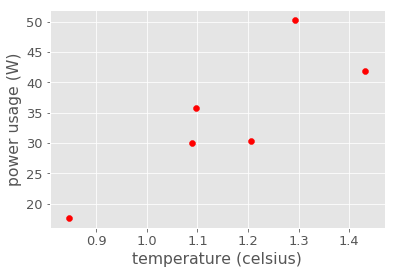

In [4]:
plt.figure()
plt.scatter(X_train,Y_train,color='r',label='training data')
plt.xlabel('temperature (celsius)')
plt.ylabel('power usage (W)')
plt.show()

In [5]:
mu = np.mean(X_poly_train,axis=0,keepdims=True)
std = np.std(X_poly_test,axis=0,keepdims=True)

X_poly_train = (X_poly_train - mu)/std

X_poly_test = (X_poly_test-mu)/std

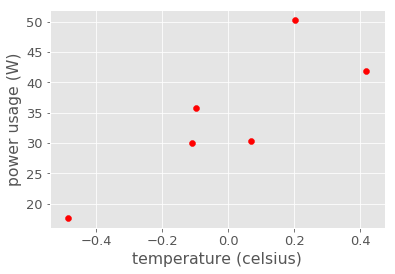

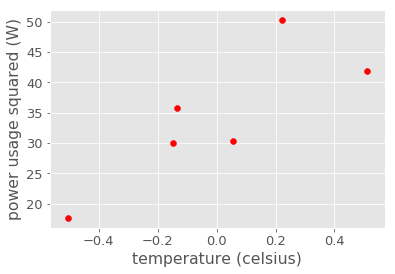

In [6]:
plt.figure()
plt.scatter(X_poly_train[:,0],Y_train,color='r',label='training data')
plt.xlabel('temperature (celsius)')
plt.ylabel('power usage (W)')
plt.show()

plt.figure()
plt.scatter(X_poly_train[:,1],Y_train,color='r',label='training data')
plt.xlabel('temperature (celsius)')
plt.ylabel('power usage squared (W)')
plt.show()

In [7]:
def MSE(Y,x,theta,b,model,lam=0.0):
    Yhat = model(x,theta,b)
    return np.mean((Y-Yhat)**2) + lam*np.sum(theta**2)

def poly(x,theta,b):
    return np.sum(theta*x,axis=1)+b

def gradient(y,x,theta,b,model,lam=0.0):
    yhat = model(x,theta,b)
    dtheta = -2*np.mean((y-yhat)[:,np.newaxis]*x,axis=0) + 2*lam*theta
    db = -2*np.mean(y-yhat)
    
    return dtheta,db

def gradient_descent(Theta,b,X_train,Y_train,X_test,Y_test,loss,gradient,model,
                     N_iterations=1000,print_every=100,learning_rate=1e-3,lam=0.0):
    train_loss = []
    test_loss = []
    iters = []
    thetas = []
    for i in range(N_iterations):
            dtheta,db = gradient(Y_train,X_train,Theta,b,model,lam)
            
            for j in range(len(Theta)):
                Theta[j] -= learning_rate*dtheta[j]
            b -= learning_rate*db

            if (i+1)%print_every == 0:
                e = loss(Y_train,X_train,Theta,b,model,lam)
                train_loss.append(e)

                e_test = loss(Y_test,X_test,Theta,b,model,lam)
                test_loss.append(e_test)

                iters.append(i)
                thetas.append(Theta.copy())
                print "Iteration {}: Theta={}, b={}, MSE_train = {}, MSE_test = {}".format(i,Theta,b,e,e_test)
                
    thetas = np.asarray(thetas)
    
    return Theta,b,thetas,train_loss,test_loss,iters

In [8]:
learning_rate = 1e-4
N_iterations = 1000000
Theta = np.asarray([1.0]*degree)
b = 1.0
print_every = 100000

In [9]:
Theta,b,thetas,train_loss,test_loss,iters = gradient_descent(Theta,b,X_poly_train,Y_train,X_poly_test,Y_test,
        MSE,gradient,poly, N_iterations=N_iterations,print_every=print_every,learning_rate=learning_rate)

Iteration 99999: Theta=[ 8.45595189  7.73695058  5.67865539  3.66599193  2.15307906  1.16886962
  0.60428947  0.33062665], b=34.2621266988, MSE_train = 35.4820891341, MSE_test = 225.434671595
Iteration 199999: Theta=[ 11.15142656   9.32118842   5.79688812   2.65417418   0.48138299
  -0.77193157  -1.34088534  -1.46547587], b=34.2621267672, MSE_train = 33.0391267874, MSE_test = 153.475785374
Iteration 299999: Theta=[ 13.45591787  10.68593943   5.9093585    1.79347344  -0.9539193
  -2.44730295  -3.02749783  -3.02904939], b=34.2621267672, MSE_train = 31.2274490327, MSE_test = 168.544525473
Iteration 399999: Theta=[ 15.42478117  11.8628087    6.01784939   1.06369173  -2.18504999
  -3.89364828  -4.49111406  -4.39213239], b=34.2621267672, MSE_train = 29.8835947348, MSE_test = 239.084316033
Iteration 499999: Theta=[ 17.104732    12.87793761   6.12290448   0.44660296  -3.24042214
  -5.14283208  -5.76275377  -5.58260924], b=34.2621267672, MSE_train = 28.8864304218, MSE_test = 342.89181818
Iterat

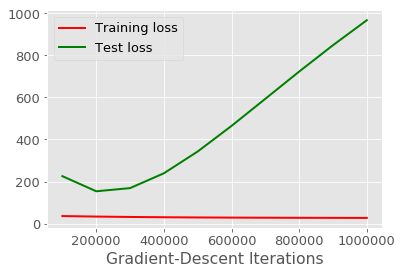

In [10]:
plt.plot(iters,train_loss,linewidth=2,color='r',label='Training loss')
plt.plot(iters,test_loss, linewidth=2, color='g', label='Test loss')
plt.xlabel('Gradient-Descent Iterations')
plt.legend()
plt.show()

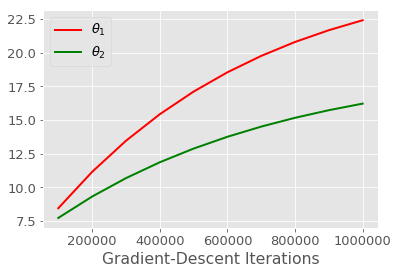

In [11]:
thetas = np.asarray(thetas)

plt.plot(iters,thetas[:,0],linewidth=2,color='r',label=r'$\theta_1$')
plt.plot(iters,thetas[:,1],linewidth=2,color='g',label=r'$\theta_2$')
plt.xlabel('Gradient-Descent Iterations')
plt.legend()
plt.show()

In [12]:
X = np.arange(0.0,2.1,0.1)
X = create_poly_features(X,degree)
X = (X-mu)/std
Yhat = poly(X,Theta,b)
X = X*std+mu

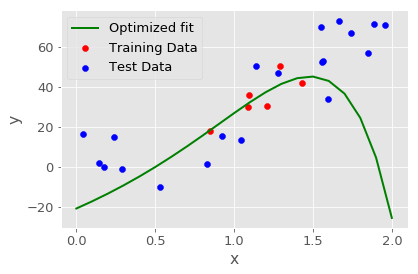

In [13]:
plt.figure()
plt.scatter(X_train,Y_train, color='r', label='Training Data')
plt.scatter(X_test,Y_test, color='b', label='Test Data')
plt.plot(X[:,0],Yhat, color='g', linewidth=2, label=r'Optimized fit')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('small_data.pdf',dpi=600)
plt.show()

In [14]:
Theta = np.asarray([1.0]*degree)
b = 1.0
lam = 0.1

In [15]:
Theta,b,thetas,train_loss,test_loss,iters = gradient_descent(Theta,b,X_poly_train,Y_train,X_poly_test,Y_test,
        MSE,gradient,poly, N_iterations=N_iterations,print_every=print_every,learning_rate=learning_rate,lam=lam)

Iteration 99999: Theta=[ 5.75096111  5.76035367  4.67267666  3.4100793   2.3365861   1.53381619
  0.97627283  0.60880761], b=34.2621266988, MSE_train = 50.2550896984, MSE_test = 235.001317116
Iteration 199999: Theta=[ 5.92052442  5.88575082  4.70457812  3.35623824  2.22183544  1.38248883
  0.80687656  0.43363755], b=34.2621267672, MSE_train = 50.2355818791, MSE_test = 227.877163541
Iteration 299999: Theta=[ 5.93950329  5.90048817  4.70882973  3.35047939  2.20870154  1.3647023
  0.78657722  0.4122941 ], b=34.2621267672, MSE_train = 50.2353127989, MSE_test = 227.081525901
Iteration 399999: Theta=[ 5.94161124  5.90222444  4.70939925  3.3498795   2.20720443  1.36260995
  0.78413675  0.40968156], b=34.2621267672, MSE_train = 50.235309068, MSE_test = 226.988504121
Iteration 499999: Theta=[ 5.94184288  5.90242934  4.70947563  3.34981922  2.20703448  1.36236345
  0.78384221  0.40936015], b=34.2621267672, MSE_train = 50.2353090159, MSE_test = 226.977552775
Iteration 599999: Theta=[ 5.94186798  

In [16]:
X = (X-mu)/std
Yhat = poly(X,Theta,b)
X = X*std+mu

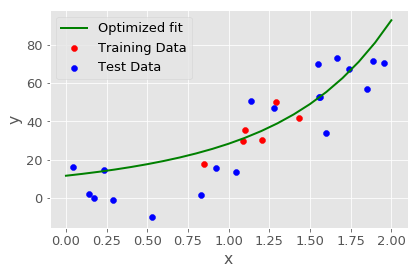

In [17]:
plt.figure()
plt.scatter(X_train,Y_train, color='r', label='Training Data')
plt.scatter(X_test,Y_test, color='b', label='Test Data')
plt.plot(X[:,0],Yhat, color='g', linewidth=2, label=r'Optimized fit')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('')
plt.show()

In [18]:
X_train, X_poly_train, Y_train = generate_data(20, degree=degree)

X_poly_test = X_poly_test*std+mu

mu = np.mean(X_poly_train,axis=0,keepdims=True)
std = np.std(X_poly_test,axis=0,keepdims=True)

X_poly_train = (X_poly_train - mu)/std
X_poly_test = (X_poly_test-mu)/std

learning_rate = 1e-4
N_iterations = 20000
Theta = np.asarray([5.0]*degree)
b = 20.0
print_every = 2000
lam=0.0

In [19]:
Theta,b,thetas,train_loss,test_loss,iters = gradient_descent(Theta,b,X_poly_train,Y_train,X_poly_test,Y_test,
        MSE,gradient,poly, N_iterations=N_iterations,print_every=print_every,learning_rate=learning_rate,lam=lam)

Iteration 1999: Theta=[ 4.62909472  4.30160396  3.98177603  3.69236174  3.43400339  3.20364912
  2.99816225  2.81458136], b=19.682177637, MSE_train = 77.4339593079, MSE_test = 263.054312779
Iteration 3999: Theta=[ 5.26567919  4.78517514  4.2434718   3.73356376  3.27182206  2.85723678
  2.48598848  2.15383358], b=19.4691434586, MSE_train = 69.3137712685, MSE_test = 246.609800614
Iteration 5999: Theta=[ 5.83451934  5.24843207  4.52687572  3.829557    3.19059729  2.61292084
  2.09332358  1.62717638], b=19.3263480911, MSE_train = 63.5715587878, MSE_test = 235.205730059
Iteration 7999: Theta=[ 6.30593368  5.65029769  4.78296343  3.92540637  3.13072962  2.4072873
  1.75355816  1.16526704], b=19.2306333229, MSE_train = 59.3513420621, MSE_test = 226.153703269
Iteration 9999: Theta=[ 6.69253038  5.99779403  5.01366853  4.01905047  3.08702414  2.23263046
  1.45693376  0.75663997], b=19.1664763618, MSE_train = 56.2267553975, MSE_test = 218.900425409
Iteration 11999: Theta=[ 7.00670302  6.29872004

In [20]:
X = (X-mu)/std
Yhat = poly(X,Theta,b)
X = X*std+mu

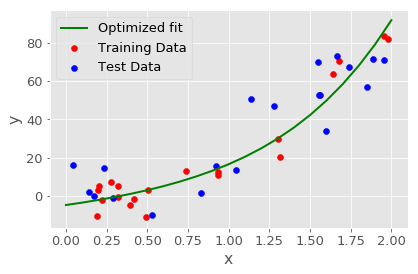

In [23]:
plt.figure()
plt.scatter(X_train,Y_train, color='r', label='Training Data')
plt.scatter(X_test,Y_test, color='b', label='Test Data')
plt.plot(X[:,0],Yhat, color='g', linewidth=2, label=r'Optimized fit')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('bigdata.pdf',dpi=600)
plt.show()